Further explaination for code is in Fall 2024, Neural Data Science, Lecture 9/10 file in notion. 

---

# Importing Packages

In [3]:
# Let's load some packages we need (pip install mne)
import mne
import mne.viz
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.channels import make_standard_montage
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

# Loading Data

In [4]:
# Define the parameters
subject = 1 # use data from subject 1
runs = [6, 10, 14] # use only hand and feet motor imagery runs
#Get data and locate in to given path
files = eegbci.load_data(subject, runs, '../datasets/')
#Read raw data files where each file contains a run
raws = [read_raw_edf(f, preload=True) for f in files]
#Combine all loaded runs
raw_obj = concatenate_raws(raws)
#Set Standard Channel Locations
eegbci.standardize(raw_obj) # set channel names
montage = make_standard_montage('standard_1005')
raw_obj.set_montage(montage)

Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


<RawEDF | S001R06.edf, 64 x 60000 (375.0 s), ~29.4 MB, data loaded>

# Extract Raw EEG Data from mne Data Object

In [5]:
raw_data = raw_obj.get_data() # OR raw_data = raw_obj._data
print("Number of channels: ", str(len(raw_data)))
print("Number of samples: ", str(len(raw_data[0])))
# Get Sampling Frequency
fs=raw_obj.info['sfreq']
print("Sampling Frequency: ", str(fs))

Number of channels:  64
Number of samples:  60000
Sampling Frequency:  160.0


# Plot the Raw Dataset using Matplotlib

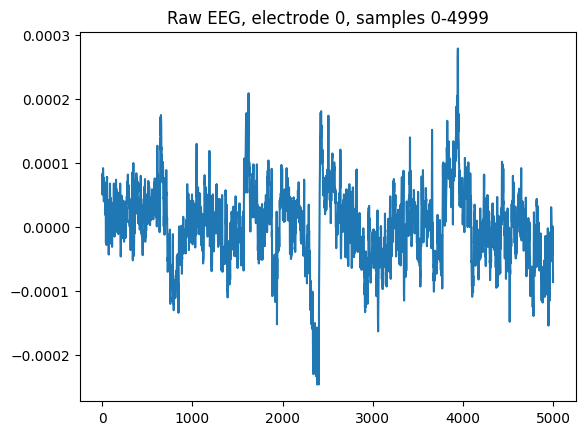

In [6]:
plt.plot(raw_data[0,:4999])
plt.title("Raw EEG, electrode 0, samples 0-4999")
plt.show()

Y is in Amplitude
X is Frequence + Phase

# Plot the raw mne object file using mne plot function

Using matplotlib as 2D backend.


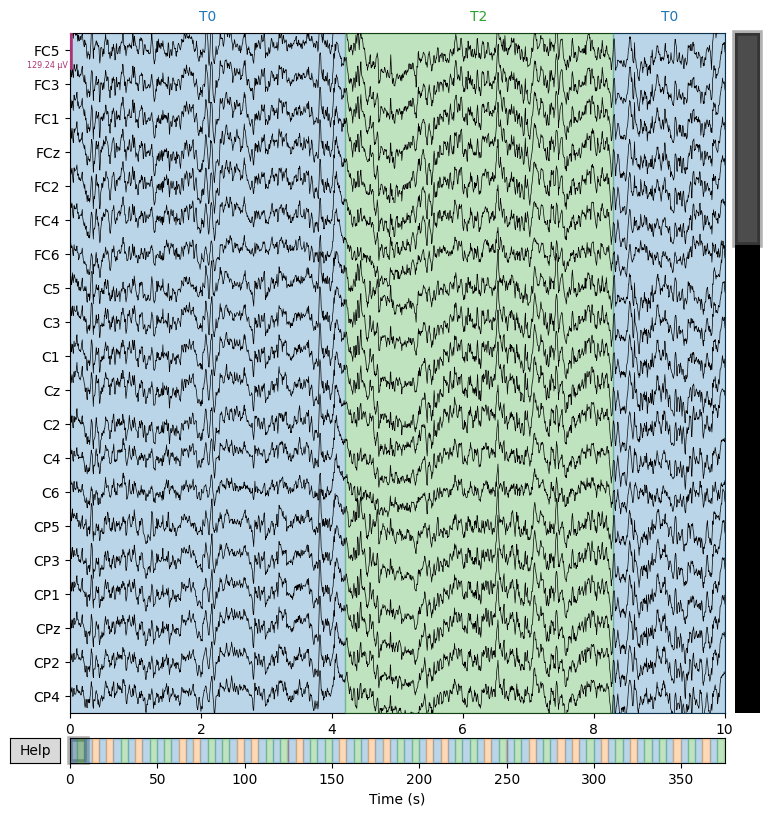

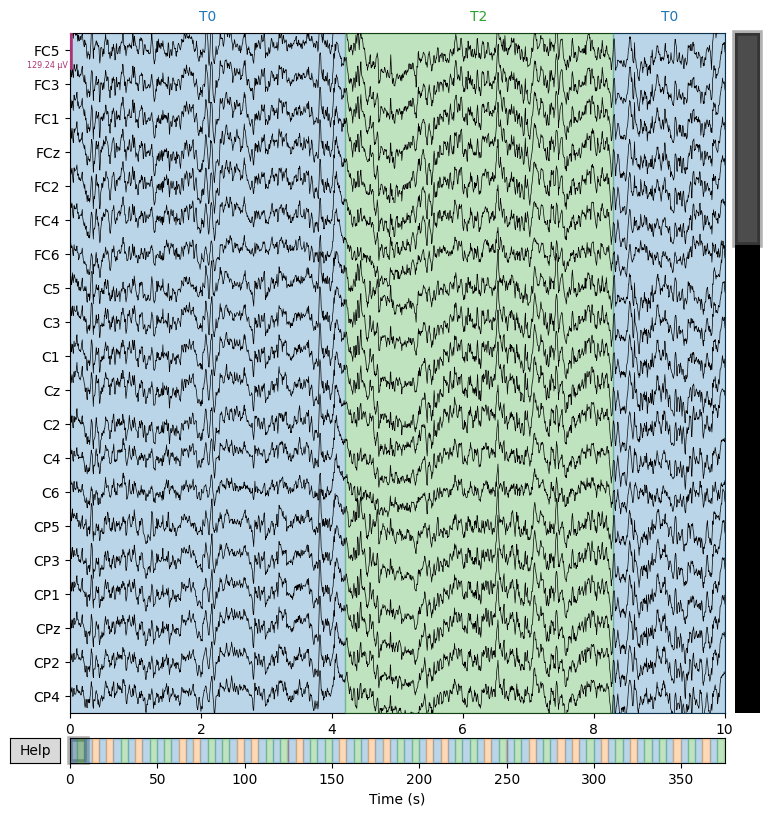

In [7]:
raw_obj.plot(scalings='auto',show=True)

Different Colors show the different events

# Converting Raw data to Epoched data

In [12]:
#Extract events from raw data
events, event_ids = mne.events_from_annotations(raw_obj, event_id='auto')
print(event_ids)
# The format of events is [Event Onset, Duration, Event ID]
print(events[0:2])

# Used Annotations descriptions: ['T0', 'T1', 'T2']
# {'T0': 1, 'T1': 2, 'T2': 3}
# [[ 0 0 1]
# [672 0 3]]

Used Annotations descriptions: ['T0', 'T1', 'T2']
{'T0': 1, 'T1': 2, 'T2': 3}
[[  0   0   1]
 [672   0   3]]


For 0 to 672 seconds, you are resting

For 672 and onward, you are imaging th closing of right fist

---

T0 corresponds to rest

T1 corresponds to onset of motion (real or imagined) of the
    left fist (in runs 3, 4, 7, 8, 11, and 12)
    both fists (in runs 5, 6, 9, 10, 13, and 14)

T2 corresponds to onset of motion (real or imagined) of the
    right fist (in runs 3, 4, 7, 8, 11, and 12)
    both feet (in runs 5, 6, 9, 10, 13, and 14)

---

# Setting Time Intervals for Epochs

In [9]:
tmin, tmax = -1, 4 # define epochs around events (in s)
#event_ids = dict(hands=2, feet=3) # map event IDs to tasks
epochs = mne.Epochs(raw_obj, events, event_ids, tmin, tmax, baseline=None, preload=True)

Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 90 events and 801 original time points ...
3 bad epochs dropped


# Accessing Epoched Data

In [10]:
#Access to the data
data = epochs._data
n_events = len(data) # or len(epochs.events)
print("Number of events: " + str(n_events))
n_channels = len(data[0,:]) # or len(epochs.ch_names)
print("Number of channels: " + str(n_channels))
n_times = len(data[0,0,:]) # or len(epochs.times)
print("Number of time instances: " + str(n_times))

Number of events: 87
Number of channels: 64
Number of time instances: 801


# Plotting Epoched Data

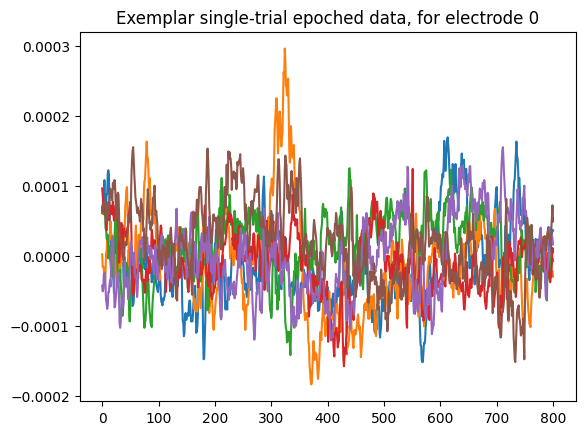

In [13]:
# The data dimension is [epochs,channels, time]
plt.plot(data[14:20,0,:].T)
plt.title("Exemplar single-trial epoched data, for electrode 0")
plt.show()

# Plotting more Epoched Data

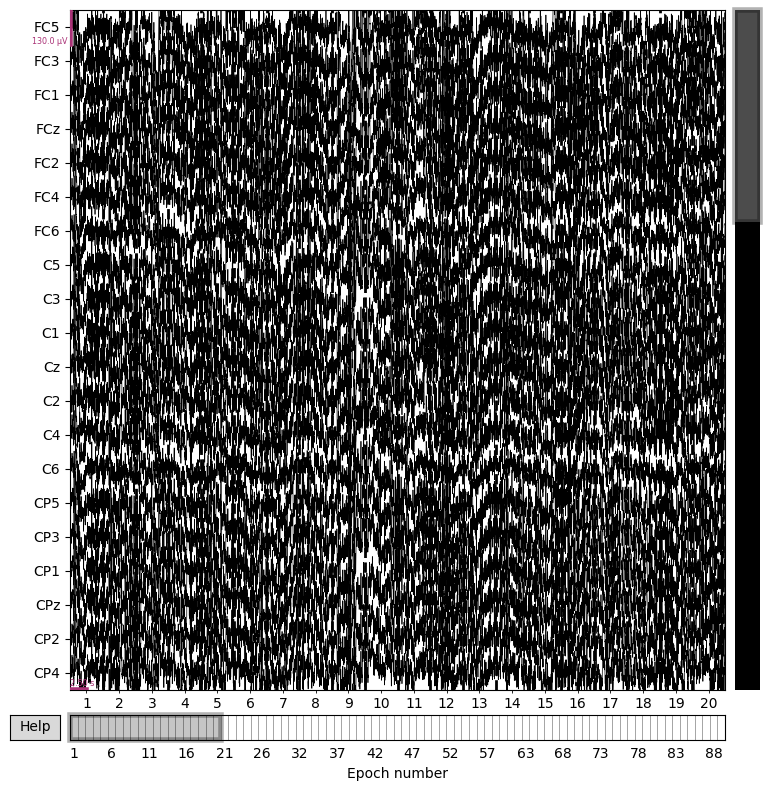

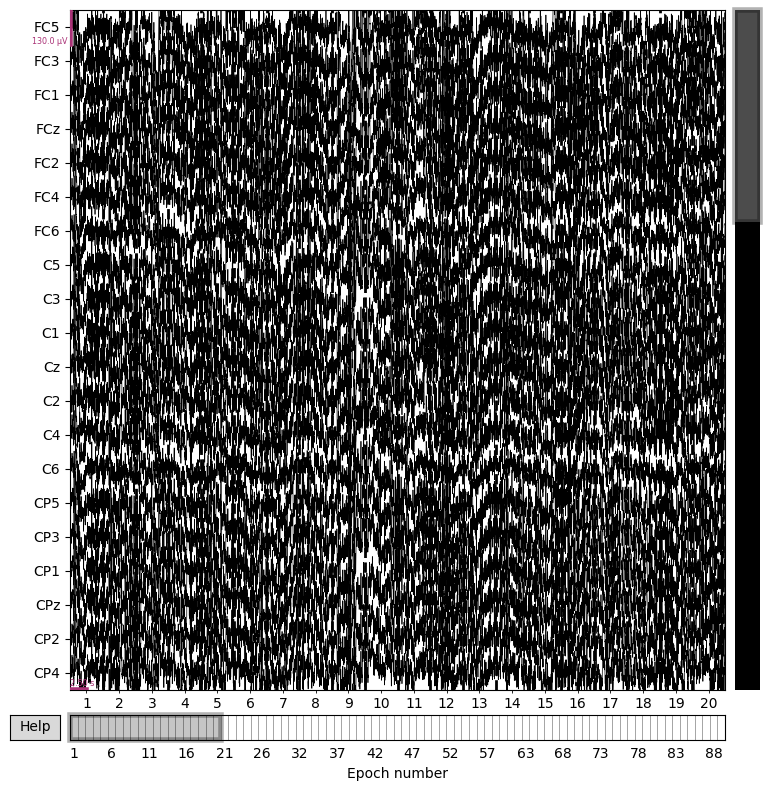

In [17]:
epochs.plot(scalings='auto',show=True)

# TODO, Try to reduce scaling

In [16]:
# TODO not done
epochs.plot(scalings='', show=True)

ValueError: scalings must be "auto" or float, got scalings['mag']='scale' which could not be converted to float

# Average Event Related Potentials

In [19]:
evoked = epochs['T1'].average()
n_channels = len(evoked.ch_names) # or len(evoked_data)
print("Number of channels: " + str(n_channels))
n_times = len(evoked.times) # or len(evoked_data[0,:])
print("Number of time instances: " + str(n_times))

Number of channels: 64
Number of time instances: 801


# Plotting ERPs

---

## Visualizing Average Epochs

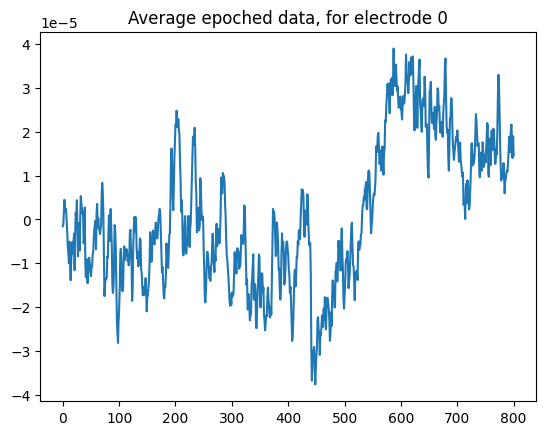

In [20]:
plt.plot(evoked._data[0,:].T)
plt.title("Average epoched data, for electrode 0")
plt.show()

## Visualizing MNE Function

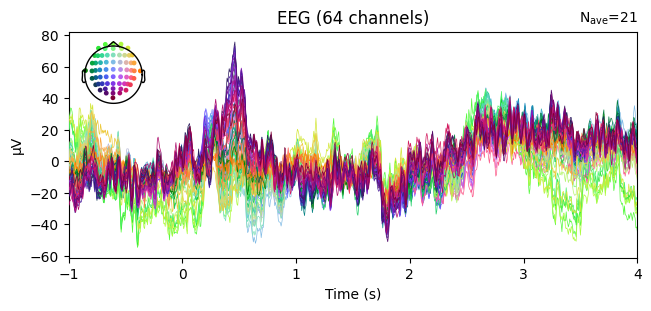

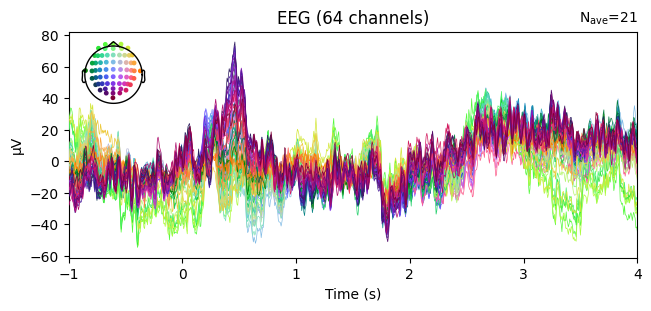

In [21]:
epochs['T1'].average().plot()

# Plotting Topographic Information

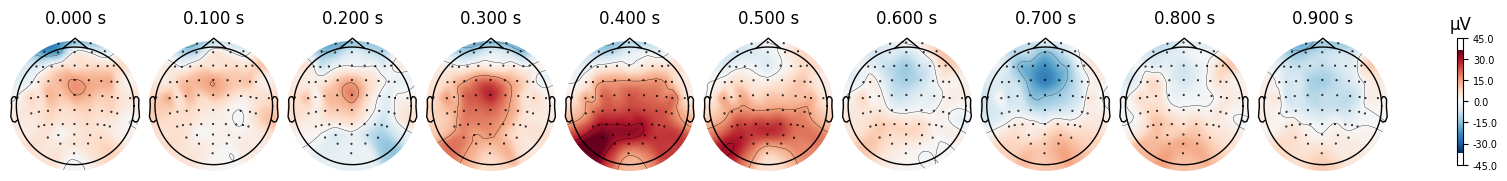

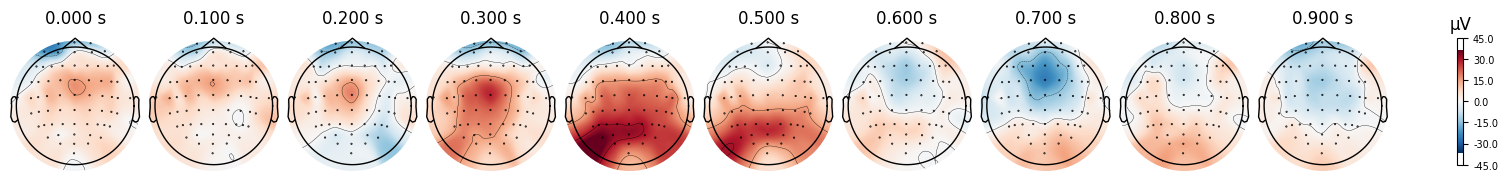

In [22]:
times = np.arange(0, 1, 0.1)
# Not to useful because it averages all event types
epochs.average().plot_topomap(times, ch_type='eeg')